<a href="https://colab.research.google.com/github/sarabdar/keras/blob/main/CNN_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install numpy
!pip install pandas
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


# To avoid this error on colab Notebook:

---------------------------------------------------------------------------

NotFoundError                             Traceback (most recent call last)

/tmp/ipython-input-3550591824.py in <cell line: 0>()
----> 1 from keras.models import Sequential
      2 from keras.layers import Dense
      3 from keras.layers import Input
      4 from keras.utils import to_categorical

11 frames

/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/load_library.py in load_library(library_location)
    149
    150     for lib in kernel_libraries:
--> 151       py_tf.TF_LoadLibrary(lib)
    152
    153   else:

NotFoundError: /usr/local/lib/python3.12/dist-packages/tensorflow/core/kernels/libtfkernel_sobol_op.so: undefined symbol: _ZN10tensorflow15TensorShapeBaseINS_11TensorShapeEEC2EN4absl12lts_202308024SpanIKlEE

In [34]:
!pip install -U "tensorflow>=2.18.0" "keras>=3.4.1" --quiet

In [52]:
import numpy as np

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

Keras layers for CNN

In [47]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

# Import and load dataset

Overview of the MNIST dataset

Full name: Modified National Institute of Standards and Technology database

Purpose: Used for training and testing image classification models, especially for recognizing handwritten digits (0–9).

Type: Image dataset (grayscale, small images)

In [37]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

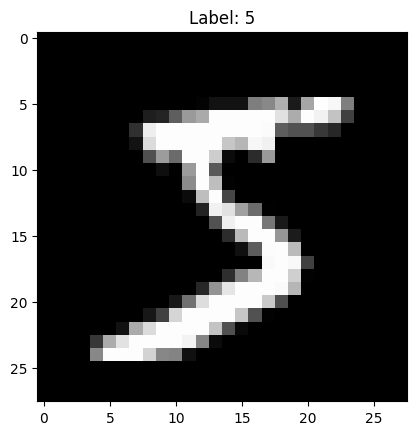

In [38]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

(60000, 28, 28)


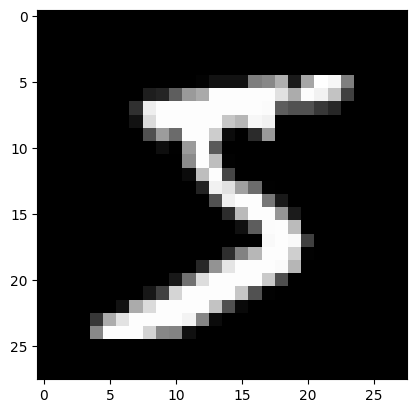

In [39]:
plt.imshow(X_train[0], cmap='grey')
print(X_train.shape)

Reshape if the dimensions are not right we need (28. 28, 1) because its a greyscale image

In [40]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

(28, 28, 1)


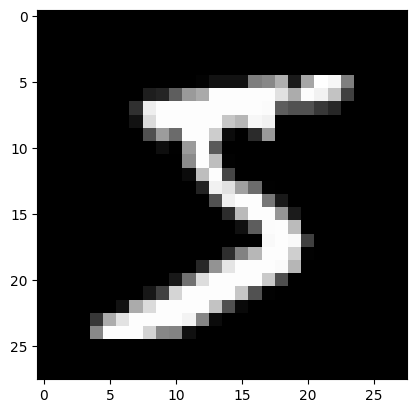

In [41]:
plt.imshow(X_train[0], cmap='grey')
print(X_train[0].shape)

In [42]:
print(X_train[0])

[[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [ 

Now normalizing the values between 0 and 1

In [43]:
X_train = X_train / 255
X_test = X_test / 255

In [44]:
print(X_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

(28, 28, 1)


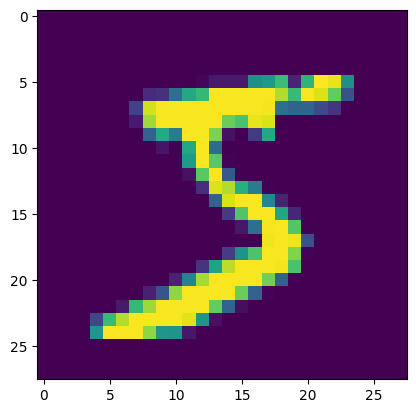

In [45]:
plt.imshow(X_train[0])
print(X_train[0].shape)

# Now let put the values in categories

In [46]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

In [49]:
print(y_test.shape)

(10000, 10)


In [55]:
# lets see the classes
print(np.argmax(y_test[0]))
print(np.argmax(y_test[2]))

# see from 0 to 9 are the classes

7
1


In [56]:
def convolutional_model():

    # create model
    model = Sequential()
    model.add(Input(shape=X_train[0].shape))
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [57]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 - 24s - 79ms/step - accuracy: 0.9264 - loss: 0.2741 - val_accuracy: 0.9751 - val_loss: 0.0824
Epoch 2/10
300/300 - 24s - 79ms/step - accuracy: 0.9791 - loss: 0.0710 - val_accuracy: 0.9820 - val_loss: 0.0571
Epoch 3/10
300/300 - 39s - 129ms/step - accuracy: 0.9852 - loss: 0.0505 - val_accuracy: 0.9862 - val_loss: 0.0436
Epoch 4/10
300/300 - 22s - 75ms/step - accuracy: 0.9885 - loss: 0.0391 - val_accuracy: 0.9869 - val_loss: 0.0410
Epoch 5/10
300/300 - 40s - 132ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9827 - val_loss: 0.0575
Epoch 6/10
300/300 - 22s - 74ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9889 - val_loss: 0.0365
Epoch 7/10
300/300 - 22s - 73ms/step - accuracy: 0.9936 - loss: 0.0217 - val_accuracy: 0.9881 - val_loss: 0.0365
Epoch 8/10
300/300 - 41s - 137ms/step - accuracy: 0.9942 - loss: 0.0191 - val_accuracy: 0.9890 - val_loss: 0.0368
Epoch 9/10
300/300 - 40s - 135ms/step - accuracy: 0.9959 - loss: 0.0144 - val_accuracy: 0.987

# Now lets do that with 2 sets of Conv and Max Pool layers

In [58]:
def convolutional_model():

    # create model
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [59]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 - 25s - 82ms/step - accuracy: 0.8556 - loss: 0.5036 - val_accuracy: 0.9520 - val_loss: 0.1603
Epoch 2/10
300/300 - 41s - 138ms/step - accuracy: 0.9597 - loss: 0.1347 - val_accuracy: 0.9710 - val_loss: 0.1000
Epoch 3/10
300/300 - 42s - 139ms/step - accuracy: 0.9729 - loss: 0.0918 - val_accuracy: 0.9784 - val_loss: 0.0693
Epoch 4/10
300/300 - 25s - 83ms/step - accuracy: 0.9779 - loss: 0.0737 - val_accuracy: 0.9803 - val_loss: 0.0631
Epoch 5/10
300/300 - 23s - 77ms/step - accuracy: 0.9816 - loss: 0.0620 - val_accuracy: 0.9818 - val_loss: 0.0622
Epoch 6/10
300/300 - 41s - 136ms/step - accuracy: 0.9838 - loss: 0.0538 - val_accuracy: 0.9846 - val_loss: 0.0523
Epoch 7/10
300/300 - 23s - 77ms/step - accuracy: 0.9852 - loss: 0.0482 - val_accuracy: 0.9857 - val_loss: 0.0467
Epoch 8/10
300/300 - 22s - 74ms/step - accuracy: 0.9872 - loss: 0.0436 - val_accuracy: 0.9847 - val_loss: 0.0446
Epoch 9/10
300/300 - 42s - 141ms/step - accuracy: 0.9884 - loss: 0.0398 - val_accuracy: 0.988